<h1> Objective : <h1>
    
<p> To predict if the website visitor will purchase the item or not</p>    

In [1]:
#Importing all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import ensemble
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import LeaveOneOut as loocv
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import plot_precision_recall_curve

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
#checking the data types and nulls of cols
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
data.shape

(12330, 18)

In [7]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [8]:
#droppping browser and operating systems which I think isn't related to the problem
data = data.drop(['Browser','OperatingSystems'],axis=1)

In [9]:
#checking to see if we have any outliers
data.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
1%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.001250,0.000000,0.000000,1.000000,1.000000
10%,0.000000,0.000000,0.000000,0.000000,3.000000,36.000000,0.000000,0.007449,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,4.000000,4.000000
90%,7.000000,224.887500,2.000000,72.000000,74.000000,2877.863333,0.058197,0.100000,18.855502,0.200000,7.000000,11.000000


There are few outliers, however removing them didn't make any significant impacts in performance of a machine learning model perhaps because they are very less.

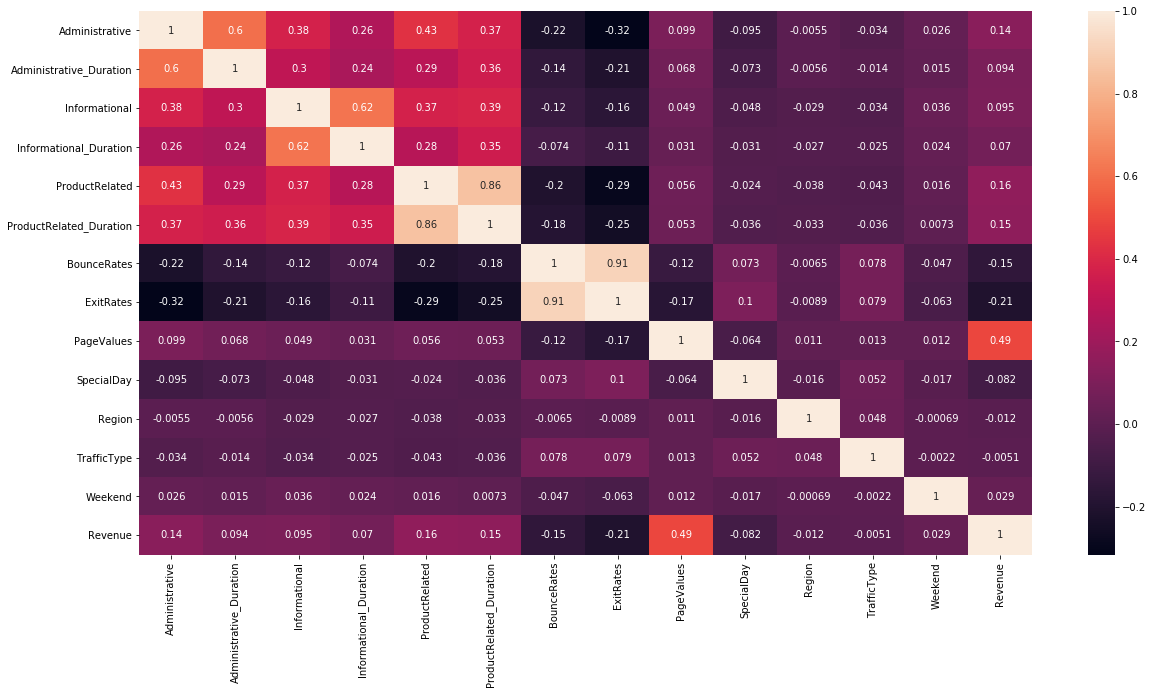

In [11]:
#checking the correlation between the numeric variables and with the dependent variable
f = plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot = True)

In [12]:
#dropping the Bounce rates since it highly correlates with ExitRates and since ExitRates have more strong correlation with the Revenue, I decided to drop BounceRates.
data= data.drop('BounceRates',axis=1)

In [13]:
#creating the list for numerical attributes and categorical attributes
num_att = ['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'ExitRates',
 'PageValues',
 'SpecialDay']
cat_columns = ['TrafficType','Region','Month','VisitorType','SpecialDay']

In [14]:
#changing the column types
for i in cat_columns:
    data[i] = data[i].astype('category')

In [15]:
#Using one hot vector encoding for the categorical data
dummy = pd.get_dummies(data[cat_columns])
data = pd.concat([data,dummy],axis=1)

In [16]:
#dropping them from original column
data = data.drop(cat_columns,axis=1)

In [17]:
#changing boolean values to 1 and 0
data.Weekend = data.Weekend.replace({True:1,False:0})
data.Revenue = data.Revenue.replace({True:1,False:0})

In [18]:
data.shape

(12330, 58)

In [19]:
#dropping the duplicates
data = data.drop_duplicates()

In [20]:
data.shape

(12072, 58)

In [21]:
#Prepared data
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,Weekend,Revenue,...,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.10,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.14,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.05,0.0,1,0,...,0,0,0,1,1,0,0,0,0,0


### In the below cell we are using stratified shuffle split and creating 2 sets of data set, one with oversampling technique and one without it

In [22]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
y=  data.loc[:,'Revenue']
X = data.drop('Revenue', axis=1)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(X_train.shape,y_train.shape)
    print(Counter(y_train))
    ct, yt = SMOTE().fit_resample(X_train,y_train)
    print(ct.shape,yt.shape)
    print(Counter(yt))
#     ct, yt = RandomUnderSampler(sampling_strategy=0.6).fit_resample(ct, yt)
#     print(ct.shape,yt.shape)
#     print(Counter(yt))

(9657, 57) (9657,)
Counter({0: 8131, 1: 1526})
(16262, 57) (16262,)
Counter({0: 8131, 1: 8131})


D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


<h1 style="font-size:40px"> Machine Learning </h1>

# Logistic Regression Unbalanced

In [23]:
model= LogisticRegression(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = model.predict(X_test)

labels = [True,False]

In [26]:
cross_val = StratifiedKFold(n_splits=10,shuffle = True)
scores = cross_validate(model, X_train, y_train, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.878
Mean Accuracy: 0.875
Mean f1: 0.476
Mean precision: 0.736
Mean recall: 0.353


ROC AUC: 0.672
Accuracy: 0.882
Balanced Accuracy: 0.672
f1: 0.495
Precision: 0.772
Recall: 0.364
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2033
           1       0.77      0.36      0.49       382

    accuracy                           0.88      2415
   macro avg       0.83      0.67      0.71      2415
weighted avg       0.87      0.88      0.86      2415



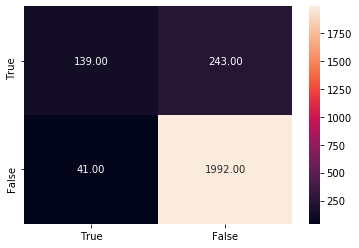

In [27]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,y_pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,y_pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,y_pred))
print('f1: %.3f' % metrics.f1_score(y_test,y_pred))
print('Precision: %.3f' % metrics.precision_score(y_test,y_pred))
print('Recall: %.3f' % metrics.recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
array = confusion_matrix(y_test,y_pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# Logistic Regression balanced

In [34]:
parameters = {'class_weight': ['balanced'], 'max_iter':[100,80,120,150,180,200]}
model= LogisticRegression(n_jobs=-1, random_state=42)
classifier_model = GridSearchCV(model, parameters, cv=10)
classifier_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': ['balanced'],
                         'max_iter': [100, 80, 120, 150, 180, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
classifier_model.best_params_

{'class_weight': 'balanced', 'max_iter': 80}

In [36]:
y_pred = classifier_model.predict(X_test)
classifier_model.best_estimator_

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=80, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
model = classifier_model.best_estimator_
cross_val = StratifiedKFold(n_splits=10,shuffle = True)
scores = cross_validate(model, X_train, y_train, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.865
Mean Accuracy: 0.874
Mean f1: 0.622
Mean precision: 0.559
Mean recall: 0.702


ROC AUC: 0.850
Accuracy: 0.884
Balanced Accuracy: 0.850
f1: 0.686
Precision: 0.602
Recall: 0.798
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2033
           1       0.60      0.80      0.69       382

    accuracy                           0.88      2415
   macro avg       0.78      0.85      0.81      2415
weighted avg       0.90      0.88      0.89      2415



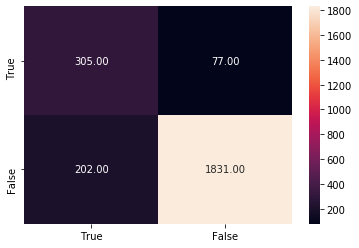

In [38]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,y_pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,y_pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,y_pred))
print('f1: %.3f' % metrics.f1_score(y_test,y_pred))
print('Precision: %.3f' % metrics.precision_score(y_test,y_pred))
print('Recall: %.3f' % metrics.recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
array = confusion_matrix(y_test,y_pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# Logistic Regression Balanced SMOTE

In [39]:
parameters = {'max_iter':[100,80,120,150,180,200]}
model= LogisticRegression(n_jobs=-1, random_state=42)
classifier_model = GridSearchCV(model, parameters, cv=10)
classifier_model.fit(ct, yt)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [100, 80, 120, 150, 180, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
classifier_model.best_params_

{'max_iter': 120}

In [41]:
y_pred = classifier_model.predict(X_test)

classifier_model.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [42]:
model = classifier_model.best_estimator_
cross_val = StratifiedKFold(n_splits=10,shuffle = True)
scores = cross_validate(model, ct, yt, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.820
Mean Accuracy: 0.910
Mean f1: 0.805
Mean precision: 0.876
Mean recall: 0.745


ROC AUC: 0.839
Accuracy: 0.872
Balanced Accuracy: 0.839
f1: 0.662
Precision: 0.569
Recall: 0.791
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2033
           1       0.57      0.79      0.66       382

    accuracy                           0.87      2415
   macro avg       0.76      0.84      0.79      2415
weighted avg       0.90      0.87      0.88      2415



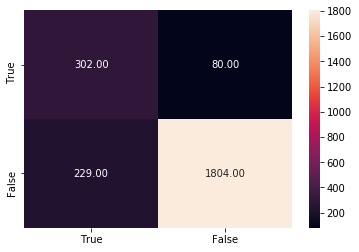

In [43]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,y_pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,y_pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,y_pred))
print('f1: %.3f' % metrics.f1_score(y_test,y_pred))
print('Precision: %.3f' % metrics.precision_score(y_test,y_pred))
print('Recall: %.3f' % metrics.recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
array = confusion_matrix(y_test,y_pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# SVM Unbalanced

In [44]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [45]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(clf, X_train, y_train, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean ROC AUC: 0.843
Mean Accuracy: 0.819
Mean f1: 0.023
Mean precision: 0.667
Mean recall: 0.012


ROC AUC: 0.508
Accuracy: 0.844
Balanced Accuracy: 0.508
f1: 0.031
Precision: 0.857
Recall: 0.016
              precision    recall  f1-score   support

           0       0.84      1.00      0.92      2033
           1       0.86      0.02      0.03       382

    accuracy                           0.84      2415
   macro avg       0.85      0.51      0.47      2415
weighted avg       0.85      0.84      0.78      2415



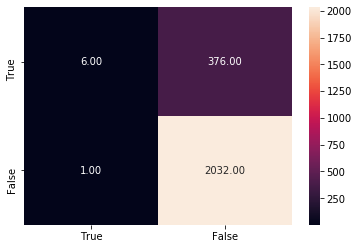

In [46]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,y_pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,y_pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,y_pred))
print('f1: %.3f' % metrics.f1_score(y_test,y_pred))
print('Precision: %.3f' % metrics.precision_score(y_test,y_pred))
print('Recall: %.3f' % metrics.recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
array = confusion_matrix(y_test,y_pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# SVM Balanced

In [47]:
clf = svm.SVC(class_weight = 'balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [48]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(clf, X_train, y_train, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.690
Mean Accuracy: 0.769
Mean f1: 0.420
Mean precision: 0.299
Mean recall: 0.709


ROC AUC: 0.737
Accuracy: 0.707
Balanced Accuracy: 0.737
f1: 0.457
Precision: 0.324
Recall: 0.780
              precision    recall  f1-score   support

           0       0.94      0.69      0.80      2033
           1       0.32      0.78      0.46       382

    accuracy                           0.71      2415
   macro avg       0.63      0.74      0.63      2415
weighted avg       0.85      0.71      0.75      2415



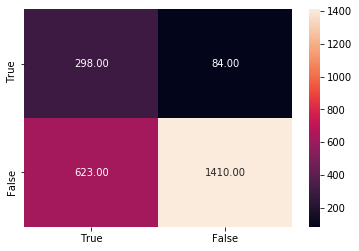

In [49]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,y_pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,y_pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,y_pred))
print('f1: %.3f' % metrics.f1_score(y_test,y_pred))
print('Precision: %.3f' % metrics.precision_score(y_test,y_pred))
print('Recall: %.3f' % metrics.recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
array = confusion_matrix(y_test,y_pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# **SVM Balanced SMOTE**

In [50]:
clf = svm.SVC()
clf.fit(ct, yt)
y_pred = clf.predict(X_test)

In [51]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(clf, ct, yt, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.712
Mean Accuracy: 0.787
Mean f1: 0.713
Mean precision: 0.711
Mean recall: 0.715


ROC AUC: 0.744
Accuracy: 0.726
Balanced Accuracy: 0.744
f1: 0.471
Precision: 0.339
Recall: 0.770
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      2033
           1       0.34      0.77      0.47       382

    accuracy                           0.73      2415
   macro avg       0.64      0.74      0.64      2415
weighted avg       0.85      0.73      0.76      2415



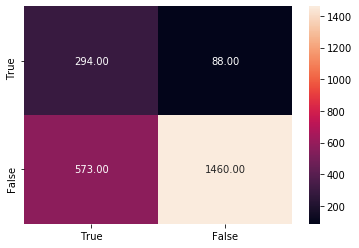

In [52]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,y_pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,y_pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,y_pred))
print('f1: %.3f' % metrics.f1_score(y_test,y_pred))
print('Precision: %.3f' % metrics.precision_score(y_test,y_pred))
print('Recall: %.3f' % metrics.recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
array = confusion_matrix(y_test,y_pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# **KNN**

In [53]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.858
Mean Accuracy: 0.753
Mean f1: 0.390
Mean precision: 0.611
Mean recall: 0.288


ROC AUC: 0.649
Accuracy: 0.867
Balanced Accuracy: 0.649
f1: 0.439
Precision: 0.656
Recall: 0.330
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2033
           1       0.66      0.33      0.44       382

    accuracy                           0.87      2415
   macro avg       0.77      0.65      0.68      2415
weighted avg       0.85      0.87      0.85      2415



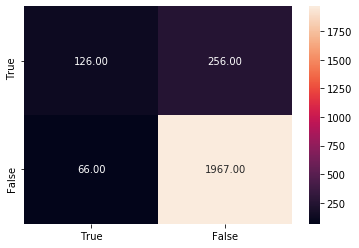

In [55]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,y_pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,y_pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,y_pred))
print('f1: %.3f' % metrics.f1_score(y_test,y_pred))
print('Precision: %.3f' % metrics.precision_score(y_test,y_pred))
print('Recall: %.3f' % metrics.recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
array = confusion_matrix(y_test,y_pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# KNN SMOTE

In [56]:
model = KNeighborsClassifier()
model.fit(ct, yt)
y_pred = model.predict(X_test)

In [57]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, ct, yt, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.861
Mean Accuracy: 0.931
Mean f1: 0.871
Mean precision: 0.812
Mean recall: 0.940


ROC AUC: 0.723
Accuracy: 0.770
Balanced Accuracy: 0.723
f1: 0.474
Precision: 0.371
Recall: 0.654
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2033
           1       0.37      0.65      0.47       382

    accuracy                           0.77      2415
   macro avg       0.65      0.72      0.66      2415
weighted avg       0.84      0.77      0.79      2415



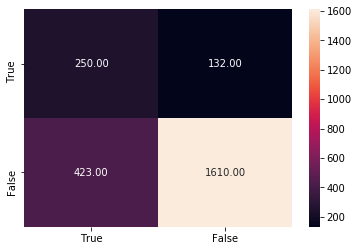

In [58]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,y_pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,y_pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,y_pred))
print('f1: %.3f' % metrics.f1_score(y_test,y_pred))
print('Precision: %.3f' % metrics.precision_score(y_test,y_pred))
print('Recall: %.3f' % metrics.recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
array = confusion_matrix(y_test,y_pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# **Decision Trees**

In [59]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [60]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.857
Mean Accuracy: 0.739
Mean f1: 0.556
Mean precision: 0.545
Mean recall: 0.568


ROC AUC: 0.751
Accuracy: 0.867
Balanced Accuracy: 0.751
f1: 0.580
Precision: 0.580
Recall: 0.581
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2033
           1       0.58      0.58      0.58       382

    accuracy                           0.87      2415
   macro avg       0.75      0.75      0.75      2415
weighted avg       0.87      0.87      0.87      2415



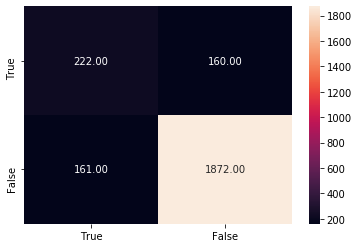

In [61]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,y_pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,y_pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,y_pred))
print('f1: %.3f' % metrics.f1_score(y_test,y_pred))
print('Precision: %.3f' % metrics.precision_score(y_test,y_pred))
print('Recall: %.3f' % metrics.recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
array = confusion_matrix(y_test,y_pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# Decision Tree Balanced

In [62]:
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [63]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.856
Mean Accuracy: 0.724
Mean f1: 0.539
Mean precision: 0.547
Mean recall: 0.531


ROC AUC: 0.736
Accuracy: 0.857
Balanced Accuracy: 0.736
f1: 0.553
Precision: 0.546
Recall: 0.560
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2033
           1       0.55      0.56      0.55       382

    accuracy                           0.86      2415
   macro avg       0.73      0.74      0.73      2415
weighted avg       0.86      0.86      0.86      2415



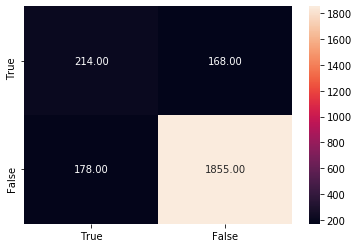

In [64]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,y_pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,y_pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,y_pred))
print('f1: %.3f' % metrics.f1_score(y_test,y_pred))
print('Precision: %.3f' % metrics.precision_score(y_test,y_pred))
print('Recall: %.3f' % metrics.recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
array = confusion_matrix(y_test,y_pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# Decision Tree SMOTE

In [65]:
model = DecisionTreeClassifier()
model.fit(ct, yt)
y_pred = model.predict(X_test)

In [66]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, ct, yt, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.906
Mean Accuracy: 0.906
Mean f1: 0.897
Mean precision: 0.907
Mean recall: 0.905


ROC AUC: 0.736
Accuracy: 0.858
Balanced Accuracy: 0.736
f1: 0.555
Precision: 0.552
Recall: 0.558
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2033
           1       0.55      0.56      0.55       382

    accuracy                           0.86      2415
   macro avg       0.73      0.74      0.74      2415
weighted avg       0.86      0.86      0.86      2415



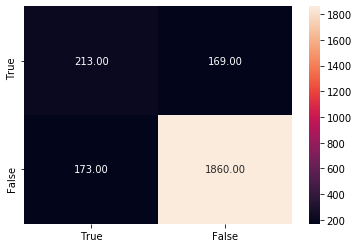

In [67]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,y_pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,y_pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,y_pred))
print('f1: %.3f' % metrics.f1_score(y_test,y_pred))
print('Precision: %.3f' % metrics.precision_score(y_test,y_pred))
print('Recall: %.3f' % metrics.recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
array = confusion_matrix(y_test,y_pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# **Random Forest**

In [68]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [69]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.898
Mean Accuracy: 0.918
Mean f1: 0.622
Mean precision: 0.753
Mean recall: 0.530


ROC AUC: 0.761
Accuracy: 0.906
Balanced Accuracy: 0.761
f1: 0.649
Precision: 0.798
Recall: 0.547
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2033
           1       0.80      0.55      0.65       382

    accuracy                           0.91      2415
   macro avg       0.86      0.76      0.80      2415
weighted avg       0.90      0.91      0.90      2415



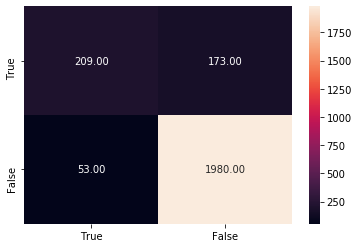

In [70]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# Random Fore Balanced

In [73]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [74]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.897
Mean Accuracy: 0.919
Mean f1: 0.615
Mean precision: 0.752
Mean recall: 0.520


ROC AUC: 0.762
Accuracy: 0.904
Balanced Accuracy: 0.762
f1: 0.647
Precision: 0.777
Recall: 0.555
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2033
           1       0.78      0.55      0.65       382

    accuracy                           0.90      2415
   macro avg       0.85      0.76      0.80      2415
weighted avg       0.90      0.90      0.90      2415



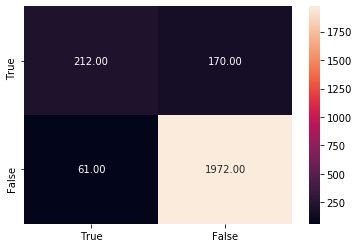

In [75]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# Random Forest SMOTE

In [76]:
model = RandomForestClassifier()
model.fit(ct, yt)
pred = model.predict(X_test)

In [77]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, ct, yt, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.930
Mean Accuracy: 0.987
Mean f1: 0.919
Mean precision: 0.948
Mean recall: 0.911


ROC AUC: 0.787
Accuracy: 0.905
Balanced Accuracy: 0.787
f1: 0.672
Precision: 0.741
Recall: 0.615
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2033
           1       0.74      0.62      0.67       382

    accuracy                           0.91      2415
   macro avg       0.84      0.79      0.81      2415
weighted avg       0.90      0.91      0.90      2415



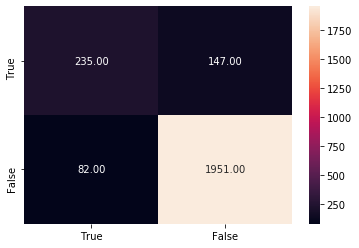

In [78]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

## Grid Search ON SMOTE Random Forest

In [48]:
parameters = {'n_estimators': [200,150,300], 'max_depth':[11,12,14,15],'min_samples_leaf':[1,2,3,4,5]}
model= RandomForestClassifier(n_jobs=-1, random_state=42)
classifier_model = GridSearchCV(model, parameters, cv=3)
classifier_model.fit(ct, yt)
pred = classifier_model.predict(X_test)

In [51]:
classifier_model.best_params_

{'max_depth': 11, 'min_samples_leaf': 4, 'n_estimators': 150}

In [79]:
classifier_model = RandomForestClassifier(n_jobs=-1,random_state=42,max_depth = 11,min_samples_leaf = 4,n_estimators =150)
classifier_model.fit(ct, yt)
pred = classifier_model.predict(X_test)

In [80]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(classifier_model, ct, yt, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.926
Mean Accuracy: 0.985
Mean f1: 0.920
Mean precision: 0.930
Mean recall: 0.922


ROC AUC: 0.835
Accuracy: 0.909
Balanced Accuracy: 0.835
f1: 0.717
Precision: 0.708
Recall: 0.725
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2033
           1       0.71      0.73      0.72       382

    accuracy                           0.91      2415
   macro avg       0.83      0.83      0.83      2415
weighted avg       0.91      0.91      0.91      2415



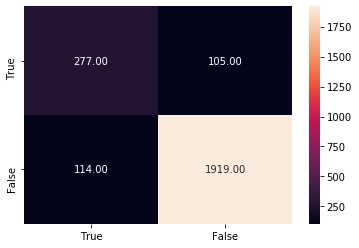

In [81]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

In [82]:
# parameters = {'n_estimators': [200,150,300,350,400], 'max_depth':[9,8,10,11,12,14,15],'min_samples_leaf':[1,2,3,4,5]}
model= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) # found by using grid search
# classifier_model = GridSearchCV(model, parameters, cv=10)
model.fit(ct, yt)
pred = model.predict(X_test)

In [83]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, ct, yt, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.929
Mean Accuracy: 0.986
Mean f1: 0.922
Mean precision: 0.937
Mean recall: 0.921


ROC AUC: 0.814
Accuracy: 0.907
Balanced Accuracy: 0.814
f1: 0.698
Precision: 0.719
Recall: 0.678
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2033
           1       0.72      0.68      0.70       382

    accuracy                           0.91      2415
   macro avg       0.83      0.81      0.82      2415
weighted avg       0.91      0.91      0.91      2415



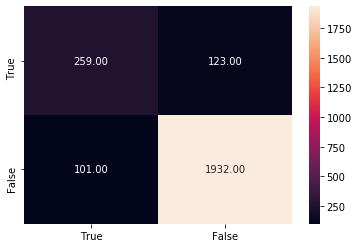

In [84]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# **Ada Boost Unbalanced**

In [85]:
model = AdaBoostClassifier(DecisionTreeClassifier())
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [86]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.858
Mean Accuracy: 0.740
Mean f1: 0.558
Mean precision: 0.551
Mean recall: 0.567


ROC AUC: 0.752
Accuracy: 0.867
Balanced Accuracy: 0.752
f1: 0.581
Precision: 0.578
Recall: 0.584
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2033
           1       0.58      0.58      0.58       382

    accuracy                           0.87      2415
   macro avg       0.75      0.75      0.75      2415
weighted avg       0.87      0.87      0.87      2415



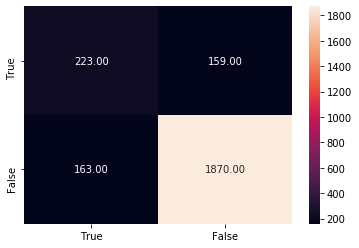

In [87]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# ADABoost Balanced

In [89]:
model = AdaBoostClassifier(DecisionTreeClassifier(class_weight = 'balanced'))
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [90]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.857
Mean Accuracy: 0.728
Mean f1: 0.544
Mean precision: 0.550
Mean recall: 0.539


ROC AUC: 0.740
Accuracy: 0.863
Balanced Accuracy: 0.740
f1: 0.564
Precision: 0.568
Recall: 0.560
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2033
           1       0.57      0.56      0.56       382

    accuracy                           0.86      2415
   macro avg       0.74      0.74      0.74      2415
weighted avg       0.86      0.86      0.86      2415



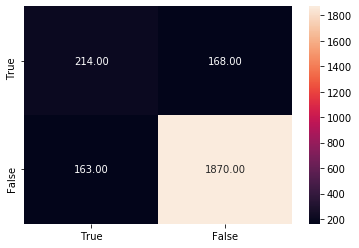

In [91]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# ADAboost SMOTE

In [93]:
model = AdaBoostClassifier(DecisionTreeClassifier())
model.fit(ct, yt)
pred = model.predict(X_test)

In [94]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, ct, yt, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.907
Mean Accuracy: 0.907
Mean f1: 0.898
Mean precision: 0.907
Mean recall: 0.906


ROC AUC: 0.733
Accuracy: 0.857
Balanced Accuracy: 0.733
f1: 0.549
Precision: 0.547
Recall: 0.552
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2033
           1       0.55      0.55      0.55       382

    accuracy                           0.86      2415
   macro avg       0.73      0.73      0.73      2415
weighted avg       0.86      0.86      0.86      2415



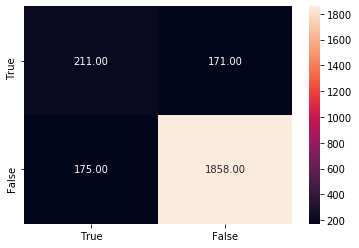

In [95]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# **Gaussian Unbalanced**

In [96]:
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [97]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))


Mean ROC AUC: 0.671
Mean Accuracy: 0.776
Mean f1: 0.423
Mean precision: 0.293
Mean recall: 0.761


ROC AUC: 0.716
Accuracy: 0.676
Balanced Accuracy: 0.716
f1: 0.431
Precision: 0.298
Recall: 0.775
              precision    recall  f1-score   support

           0       0.94      0.66      0.77      2033
           1       0.30      0.77      0.43       382

    accuracy                           0.68      2415
   macro avg       0.62      0.72      0.60      2415
weighted avg       0.84      0.68      0.72      2415



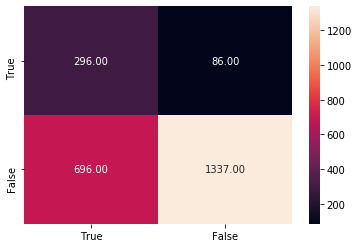

In [98]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# Gaussian SMOTE

In [104]:
model = GaussianNB()
model.fit(ct, yt)
pred = model.predict(X_test)

In [105]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, ct, yt, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.687
Mean Accuracy: 0.814
Mean f1: 0.744
Mean precision: 0.630
Mean recall: 0.908


ROC AUC: 0.671
Accuracy: 0.540
Balanced Accuracy: 0.671
f1: 0.372
Precision: 0.237
Recall: 0.861
              precision    recall  f1-score   support

           0       0.95      0.48      0.64      2033
           1       0.24      0.86      0.37       382

    accuracy                           0.54      2415
   macro avg       0.59      0.67      0.50      2415
weighted avg       0.84      0.54      0.60      2415



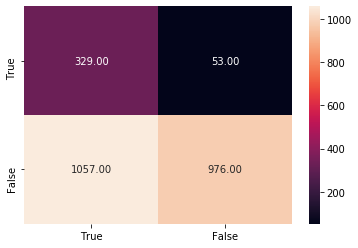

In [106]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# Gradient Boosting Unbalanced

In [119]:
gb = ensemble.GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
pred = gb.predict(X_test)

In [120]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(gb, X_train, y_train, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.897
Mean Accuracy: 0.927
Mean f1: 0.648
Mean precision: 0.707
Mean recall: 0.599


ROC AUC: 0.785
Accuracy: 0.906
Balanced Accuracy: 0.785
f1: 0.671
Precision: 0.751
Recall: 0.607
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2033
           1       0.75      0.61      0.67       382

    accuracy                           0.91      2415
   macro avg       0.84      0.78      0.81      2415
weighted avg       0.90      0.91      0.90      2415



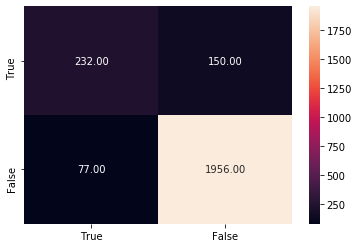

In [121]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# Gradient Boosting SMOTE

In [122]:
gb = ensemble.GradientBoostingClassifier(random_state=0)
gb.fit(ct, yt)
pred = gb.predict(X_test)

In [123]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(gb, ct, yt, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.924
Mean Accuracy: 0.984
Mean f1: 0.915
Mean precision: 0.932
Mean recall: 0.914


ROC AUC: 0.832
Accuracy: 0.910
Balanced Accuracy: 0.832
f1: 0.716
Precision: 0.715
Recall: 0.717
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2033
           1       0.72      0.72      0.72       382

    accuracy                           0.91      2415
   macro avg       0.83      0.83      0.83      2415
weighted avg       0.91      0.91      0.91      2415



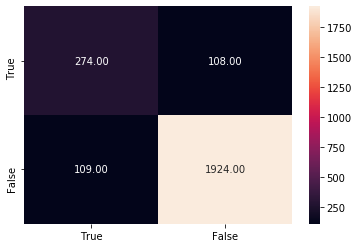

In [124]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# Grid Search Gradient Boosting

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
parameters = {'loss': ['deviance','exponential'], 'learning_rate':[0.1,1,0.05,0.2,0.01],'n_estimators':[100,200,300], "min_samples_split":[2,4,6,8,10], "max_depth":[2,4,6,8,10] }
model= ensemble.GradientBoostingClassifier(random_state=0)
classifier_model = GridSearchCV(model, parameters, cv=5,n_jobs=-1)
classifier_model.fit(ct, yt)

In [32]:
classifier_model.best_params_

{'learning_rate': 0.01,
 'loss': 'exponential',
 'max_depth': 6,
 'min_samples_split': 6,
 'n_estimators': 300}

In [131]:
model = ensemble.GradientBoostingClassifier(learning_rate = 0.1, loss='exponential',max_depth = 6,min_samples_split = 6,n_estimators =300)
model.fit(ct, yt)
pred = model.predict(X_test)

In [132]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, ct, yt, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.930
Mean Accuracy: 0.986
Mean f1: 0.919
Mean precision: 0.947
Mean recall: 0.912


ROC AUC: 0.804
Accuracy: 0.911
Balanced Accuracy: 0.804
f1: 0.697
Precision: 0.752
Recall: 0.649
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2033
           1       0.75      0.65      0.70       382

    accuracy                           0.91      2415
   macro avg       0.84      0.80      0.82      2415
weighted avg       0.91      0.91      0.91      2415



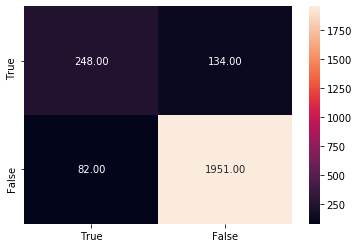

In [133]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# XgBoost Unbalanced

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [25]:
# create a default XGBoost classifier
model = XGBClassifier(tree_method = "gpu_hist", random_state=0)
eval_set = [(X_test, y_test), (X_test.values, y_test)]
eval_metric = ["auc","error"]
model.fit(X_train, y_train, verbose=False)
pred = model.predict(X_test)

In [26]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.890
Mean Accuracy: 0.917
Mean f1: 0.618
Mean precision: 0.685
Mean recall: 0.564


ROC AUC: 0.769
Accuracy: 0.900
Balanced Accuracy: 0.769
f1: 0.646
Precision: 0.736
Recall: 0.576
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2033
           1       0.74      0.58      0.65       382

    accuracy                           0.90      2415
   macro avg       0.83      0.77      0.79      2415
weighted avg       0.89      0.90      0.90      2415



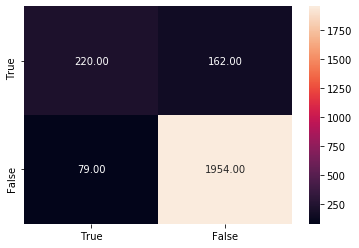

In [28]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# XgBoost SMOTE

In [30]:
# create a default XGBoost classifier
model = XGBClassifier(tree_method = "gpu_hist", random_state=0)
model.fit(ct, yt, verbose=False)
pred = model.predict(X_test.values)

In [31]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, ct, yt, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.930
Mean Accuracy: 0.986
Mean f1: 0.918
Mean precision: 0.947
Mean recall: 0.911


ROC AUC: 0.785
Accuracy: 0.899
Balanced Accuracy: 0.785
f1: 0.660
Precision: 0.709
Recall: 0.618
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2033
           1       0.71      0.62      0.66       382

    accuracy                           0.90      2415
   macro avg       0.82      0.79      0.80      2415
weighted avg       0.89      0.90      0.90      2415



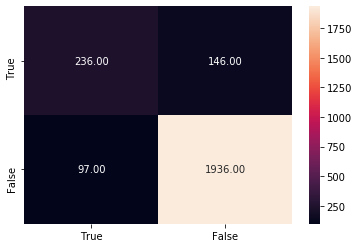

In [32]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# Random Search XgBoost

In [29]:

n_iter=50
model2 = XGBClassifier(
    tree_method = "gpu_hist",
    random_state=0
)
# Create the grid search parameter grid and scoring funcitons
param_grid = {
    "learning_rate": [0.1, 0.01],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [2, 3, 4],
    "n_estimators": [100, 200, 300, 400],
    "reg_lambda": [1, 1.5, 2],
    "gamma": [0, 0.1, 0.3]
}
scoring = {
    'AUC': 'roc_auc', 
    'f1_score': "f1"
}
# create the Kfold object
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, random_state=0)
# create the grid search object
n_iter=50
grid1 = RandomizedSearchCV(estimator=model2, param_distributions=param_grid, cv=kfold, scoring=scoring, n_iter=n_iter, refit="AUC")
# fit grid search
best_model = grid1.fit(ct,yt)

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [33]:
best_model.best_params_

{'subsample': 0.8,
 'reg_lambda': 1.5,
 'n_estimators': 300,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.8}

In [34]:
model = XGBClassifier(
    tree_method = "gpu_hist",
    random_state=0,
    subsample=0.8,
    reg_lambda = 1.5,
    n_estimators=300,
    max_depth = 4,
    learning_rate = 0.1,
    gamma = 0,
    colsample_bytree = 0.8
)
model.fit(ct,yt)
pred  = model.predict(X_test.values)

In [35]:
cross_val = StratifiedKFold(n_splits=10)
scores = cross_validate(model, ct, yt, cv=cross_val,scoring = ('accuracy', 'roc_auc','f1','precision','recall'))
print('Mean ROC AUC: %.3f' % mean(scores['test_accuracy']))
print('Mean Accuracy: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean recall: %.3f' % mean(scores['test_recall']))

Mean ROC AUC: 0.927
Mean Accuracy: 0.986
Mean f1: 0.914
Mean precision: 0.945
Mean recall: 0.907


ROC AUC: 0.796
Accuracy: 0.908
Balanced Accuracy: 0.796
f1: 0.686
Precision: 0.751
Recall: 0.631
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2033
           1       0.75      0.63      0.69       382

    accuracy                           0.91      2415
   macro avg       0.84      0.80      0.82      2415
weighted avg       0.90      0.91      0.91      2415



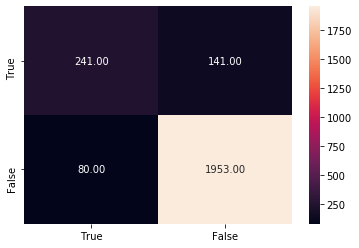

In [36]:
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# Deep Learning Model

In [28]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import tensorflow as tf

# Unbalanced

In [24]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sd = StandardScaler()
X = sd.fit_transform(X_train)
X_test = sd.transform(X_test)
y=  y_train

for train_index, test_index in sss.split(X, y):
    Xt, X_val = X[train_index], X[test_index]
    ytr, y_val = y.iloc[train_index], y.iloc[test_index]

In [25]:
(train_data, train_target), (test_data, test_target) = (Xt,ytr),(X_val,y_val)

In [26]:
(train_data.shape, train_target.shape), (test_data.shape, test_target.shape)

(((7725, 57), (7725,)), ((1932, 57), (1932,)))

In [27]:
train_target.sum(), test_target.sum()

(1221, 305)

In [33]:
# Start neural network
network = models.Sequential()


# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(30, activation='relu', input_shape=(ct.shape[1],)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(15, activation='relu'))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(1, activation='sigmoid'))

In [34]:
# Compile neural network

network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='ADAM', # Root Mean Square Propagation
                metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]) # Accuracy performance metric

In [35]:
# Train neural network
history = network.fit(train_data, # Features
                      train_target, # Target vector
                      epochs=300, # Number of epochs
                      verbose=2, # Print description after each epoch
                      batch_size=200, # Number of observations per batch
                      validation_data=(test_data, test_target)) # Data for evaluation

Train on 7725 samples, validate on 1932 samples
Epoch 1/300
 - 0s - loss: 0.5289 - accuracy: 0.8172 - auc_1: 0.5032 - precision_1: 0.1504 - recall_1: 0.0575 - val_loss: 0.4699 - val_accuracy: 0.8421 - val_auc_1: 0.5278 - val_precision_1: 0.1625 - val_recall_1: 0.0331
Epoch 2/300
 - 0s - loss: 0.4799 - accuracy: 0.8386 - auc_1: 0.5398 - precision_1: 0.1558 - recall_1: 0.0228 - val_loss: 0.4363 - val_accuracy: 0.8421 - val_auc_1: 0.5532 - val_precision_1: 0.1534 - val_recall_1: 0.0164
Epoch 3/300
 - 0s - loss: 0.4419 - accuracy: 0.8413 - auc_1: 0.5677 - precision_1: 0.1536 - recall_1: 0.0133 - val_loss: 0.4153 - val_accuracy: 0.8421 - val_auc_1: 0.5831 - val_precision_1: 0.1553 - val_recall_1: 0.0112
Epoch 4/300
 - 0s - loss: 0.4290 - accuracy: 0.8419 - auc_1: 0.5927 - precision_1: 0.1553 - recall_1: 0.0096 - val_loss: 0.3969 - val_accuracy: 0.8421 - val_auc_1: 0.6028 - val_precision_1: 0.1553 - val_recall_1: 0.0084
Epoch 5/300
 - 0s - loss: 0.4029 - accuracy: 0.8422 - auc_1: 0.6144 - pr

Epoch 38/300
 - 0s - loss: 0.2868 - accuracy: 0.8728 - auc_1: 0.8216 - precision_1: 0.7019 - recall_1: 0.1439 - val_loss: 0.2795 - val_accuracy: 0.8866 - val_auc_1: 0.8226 - val_precision_1: 0.7008 - val_recall_1: 0.1472
Epoch 39/300
 - 0s - loss: 0.2782 - accuracy: 0.8747 - auc_1: 0.8236 - precision_1: 0.7003 - recall_1: 0.1503 - val_loss: 0.2746 - val_accuracy: 0.8861 - val_auc_1: 0.8248 - val_precision_1: 0.7000 - val_recall_1: 0.1538
Epoch 40/300
 - 0s - loss: 0.2800 - accuracy: 0.8733 - auc_1: 0.8258 - precision_1: 0.6997 - recall_1: 0.1565 - val_loss: 0.2740 - val_accuracy: 0.8882 - val_auc_1: 0.8268 - val_precision_1: 0.6998 - val_recall_1: 0.1595
Epoch 41/300
 - 0s - loss: 0.2822 - accuracy: 0.8760 - auc_1: 0.8278 - precision_1: 0.7000 - recall_1: 0.1625 - val_loss: 0.2745 - val_accuracy: 0.8877 - val_auc_1: 0.8288 - val_precision_1: 0.6999 - val_recall_1: 0.1654
Epoch 42/300
 - 0s - loss: 0.2783 - accuracy: 0.8731 - auc_1: 0.8297 - precision_1: 0.6996 - recall_1: 0.1679 - val_

Epoch 76/300
 - 0s - loss: 0.2519 - accuracy: 0.8924 - auc_1: 0.8680 - precision_1: 0.6966 - recall_1: 0.3319 - val_loss: 0.2683 - val_accuracy: 0.8923 - val_auc_1: 0.8683 - val_precision_1: 0.6965 - val_recall_1: 0.3335
Epoch 77/300
 - 0s - loss: 0.2523 - accuracy: 0.8945 - auc_1: 0.8687 - precision_1: 0.6963 - recall_1: 0.3351 - val_loss: 0.2712 - val_accuracy: 0.8923 - val_auc_1: 0.8690 - val_precision_1: 0.6964 - val_recall_1: 0.3368
Epoch 78/300
 - 0s - loss: 0.2553 - accuracy: 0.8928 - auc_1: 0.8694 - precision_1: 0.6964 - recall_1: 0.3384 - val_loss: 0.2700 - val_accuracy: 0.8944 - val_auc_1: 0.8696 - val_precision_1: 0.6964 - val_recall_1: 0.3399
Epoch 79/300
 - 0s - loss: 0.2485 - accuracy: 0.8979 - auc_1: 0.8700 - precision_1: 0.6965 - recall_1: 0.3415 - val_loss: 0.2687 - val_accuracy: 0.8923 - val_auc_1: 0.8703 - val_precision_1: 0.6965 - val_recall_1: 0.3432
Epoch 80/300
 - 0s - loss: 0.2514 - accuracy: 0.8957 - auc_1: 0.8706 - precision_1: 0.6965 - recall_1: 0.3448 - val_

Epoch 114/300
 - 0s - loss: 0.2388 - accuracy: 0.8997 - auc_1: 0.8863 - precision_1: 0.6937 - recall_1: 0.4238 - val_loss: 0.2743 - val_accuracy: 0.8866 - val_auc_1: 0.8865 - val_precision_1: 0.6938 - val_recall_1: 0.4247
Epoch 115/300
 - 0s - loss: 0.2404 - accuracy: 0.8993 - auc_1: 0.8867 - precision_1: 0.6938 - recall_1: 0.4256 - val_loss: 0.2744 - val_accuracy: 0.8866 - val_auc_1: 0.8868 - val_precision_1: 0.6937 - val_recall_1: 0.4265
Epoch 116/300
 - 0s - loss: 0.2419 - accuracy: 0.8958 - auc_1: 0.8870 - precision_1: 0.6936 - recall_1: 0.4273 - val_loss: 0.2744 - val_accuracy: 0.8882 - val_auc_1: 0.8871 - val_precision_1: 0.6936 - val_recall_1: 0.4282
Epoch 117/300
 - 0s - loss: 0.2322 - accuracy: 0.8993 - auc_1: 0.8873 - precision_1: 0.6935 - recall_1: 0.4290 - val_loss: 0.2723 - val_accuracy: 0.8846 - val_auc_1: 0.8875 - val_precision_1: 0.6935 - val_recall_1: 0.4299
Epoch 118/300
 - 0s - loss: 0.2408 - accuracy: 0.8992 - auc_1: 0.8877 - precision_1: 0.6935 - recall_1: 0.4308 -

Epoch 151/300
 - 0s - loss: 0.2336 - accuracy: 0.8979 - auc_1: 0.8964 - precision_1: 0.6926 - recall_1: 0.4756 - val_loss: 0.2778 - val_accuracy: 0.8856 - val_auc_1: 0.8965 - val_precision_1: 0.6925 - val_recall_1: 0.4760
Epoch 152/300
 - 0s - loss: 0.2325 - accuracy: 0.9002 - auc_1: 0.8966 - precision_1: 0.6925 - recall_1: 0.4765 - val_loss: 0.2754 - val_accuracy: 0.8877 - val_auc_1: 0.8967 - val_precision_1: 0.6925 - val_recall_1: 0.4771
Epoch 153/300
 - 0s - loss: 0.2295 - accuracy: 0.9029 - auc_1: 0.8968 - precision_1: 0.6926 - recall_1: 0.4776 - val_loss: 0.2749 - val_accuracy: 0.8866 - val_auc_1: 0.8969 - val_precision_1: 0.6926 - val_recall_1: 0.4781
Epoch 154/300
 - 0s - loss: 0.2308 - accuracy: 0.8989 - auc_1: 0.8970 - precision_1: 0.6926 - recall_1: 0.4786 - val_loss: 0.2714 - val_accuracy: 0.8866 - val_auc_1: 0.8971 - val_precision_1: 0.6926 - val_recall_1: 0.4791
Epoch 155/300
 - 0s - loss: 0.2312 - accuracy: 0.9007 - auc_1: 0.8972 - precision_1: 0.6926 - recall_1: 0.4796 -

Epoch 188/300
 - 0s - loss: 0.2270 - accuracy: 0.9049 - auc_1: 0.9031 - precision_1: 0.6937 - recall_1: 0.5092 - val_loss: 0.2721 - val_accuracy: 0.8877 - val_auc_1: 0.9032 - val_precision_1: 0.6937 - val_recall_1: 0.5096
Epoch 189/300
 - 0s - loss: 0.2295 - accuracy: 0.9007 - auc_1: 0.9033 - precision_1: 0.6937 - recall_1: 0.5100 - val_loss: 0.2728 - val_accuracy: 0.8892 - val_auc_1: 0.9033 - val_precision_1: 0.6937 - val_recall_1: 0.5103
Epoch 190/300
 - 0s - loss: 0.2279 - accuracy: 0.9038 - auc_1: 0.9034 - precision_1: 0.6937 - recall_1: 0.5107 - val_loss: 0.2687 - val_accuracy: 0.8898 - val_auc_1: 0.9035 - val_precision_1: 0.6937 - val_recall_1: 0.5110
Epoch 191/300
 - 0s - loss: 0.2233 - accuracy: 0.9061 - auc_1: 0.9035 - precision_1: 0.6938 - recall_1: 0.5114 - val_loss: 0.2707 - val_accuracy: 0.8882 - val_auc_1: 0.9036 - val_precision_1: 0.6939 - val_recall_1: 0.5118
Epoch 192/300
 - 0s - loss: 0.2263 - accuracy: 0.9033 - auc_1: 0.9037 - precision_1: 0.6938 - recall_1: 0.5121 -

Epoch 225/300
 - 0s - loss: 0.2223 - accuracy: 0.9049 - auc_1: 0.9078 - precision_1: 0.6950 - recall_1: 0.5328 - val_loss: 0.2680 - val_accuracy: 0.8887 - val_auc_1: 0.9079 - val_precision_1: 0.6950 - val_recall_1: 0.5331
Epoch 226/300
 - 0s - loss: 0.2214 - accuracy: 0.9034 - auc_1: 0.9079 - precision_1: 0.6951 - recall_1: 0.5334 - val_loss: 0.2692 - val_accuracy: 0.8866 - val_auc_1: 0.9080 - val_precision_1: 0.6950 - val_recall_1: 0.5336
Epoch 227/300
 - 0s - loss: 0.2148 - accuracy: 0.9071 - auc_1: 0.9081 - precision_1: 0.6950 - recall_1: 0.5340 - val_loss: 0.2656 - val_accuracy: 0.8903 - val_auc_1: 0.9081 - val_precision_1: 0.6951 - val_recall_1: 0.5343
Epoch 228/300
 - 0s - loss: 0.2212 - accuracy: 0.9037 - auc_1: 0.9082 - precision_1: 0.6951 - recall_1: 0.5346 - val_loss: 0.2669 - val_accuracy: 0.8882 - val_auc_1: 0.9082 - val_precision_1: 0.6951 - val_recall_1: 0.5348
Epoch 229/300
 - 0s - loss: 0.2200 - accuracy: 0.9058 - auc_1: 0.9083 - precision_1: 0.6951 - recall_1: 0.5351 -

Epoch 262/300
 - 0s - loss: 0.2209 - accuracy: 0.9034 - auc_1: 0.9115 - precision_1: 0.6959 - recall_1: 0.5509 - val_loss: 0.2702 - val_accuracy: 0.8856 - val_auc_1: 0.9116 - val_precision_1: 0.6959 - val_recall_1: 0.5511
Epoch 263/300
 - 0s - loss: 0.2204 - accuracy: 0.9063 - auc_1: 0.9116 - precision_1: 0.6959 - recall_1: 0.5513 - val_loss: 0.2694 - val_accuracy: 0.8861 - val_auc_1: 0.9117 - val_precision_1: 0.6959 - val_recall_1: 0.5515
Epoch 264/300
 - 0s - loss: 0.2184 - accuracy: 0.9063 - auc_1: 0.9117 - precision_1: 0.6959 - recall_1: 0.5517 - val_loss: 0.2678 - val_accuracy: 0.8866 - val_auc_1: 0.9117 - val_precision_1: 0.6960 - val_recall_1: 0.5520
Epoch 265/300
 - 0s - loss: 0.2206 - accuracy: 0.9061 - auc_1: 0.9118 - precision_1: 0.6960 - recall_1: 0.5521 - val_loss: 0.2693 - val_accuracy: 0.8877 - val_auc_1: 0.9118 - val_precision_1: 0.6960 - val_recall_1: 0.5523
Epoch 266/300
 - 0s - loss: 0.2186 - accuracy: 0.9064 - auc_1: 0.9119 - precision_1: 0.6960 - recall_1: 0.5526 -

Epoch 299/300
 - 0s - loss: 0.2154 - accuracy: 0.9047 - auc_1: 0.9144 - precision_1: 0.6969 - recall_1: 0.5647 - val_loss: 0.2677 - val_accuracy: 0.8887 - val_auc_1: 0.9144 - val_precision_1: 0.6969 - val_recall_1: 0.5648
Epoch 300/300
 - 0s - loss: 0.2170 - accuracy: 0.9010 - auc_1: 0.9145 - precision_1: 0.6969 - recall_1: 0.5650 - val_loss: 0.2658 - val_accuracy: 0.8892 - val_auc_1: 0.9145 - val_precision_1: 0.6969 - val_recall_1: 0.5651


## AT cutoff 50%

In [36]:
ypred = network.predict(X_test)

pred =(ypred>=0.50)

ROC AUC: 0.810
Accuracy: 0.900
Balanced Accuracy: 0.810
f1: 0.682
Precision: 0.685
Recall: 0.678
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2033
           1       0.69      0.68      0.68       382

    accuracy                           0.90      2415
   macro avg       0.81      0.81      0.81      2415
weighted avg       0.90      0.90      0.90      2415



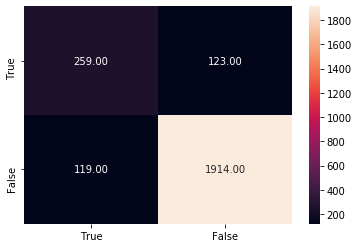

In [37]:
labels = [True, False]
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

In [72]:
ypred = network.predict(X_test)

pred =(ypred>=0.32)

ROC AUC: 0.838
Accuracy: 0.900
Balanced Accuracy: 0.838
f1: 0.703
Precision: 0.662
Recall: 0.749
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2033
           1       0.66      0.75      0.70       382

    accuracy                           0.90      2415
   macro avg       0.81      0.84      0.82      2415
weighted avg       0.91      0.90      0.90      2415



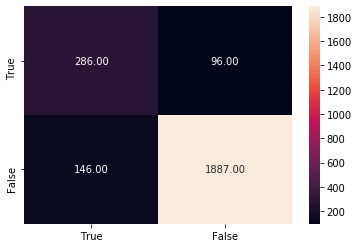

In [73]:
labels = [True, False]
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

# Using class weight param

In [142]:
# Train neural network
history = network.fit(train_data, # Features
                      train_target, # Target vector
                      epochs=200, # Number of epochs
                      verbose=2, # Print description after each epoch
                      batch_size=200, # Number of observations per batch
                      class_weight ={0:0.35,1:0.65},
                      validation_data=(test_data, test_target)) # Data for evaluation

Train on 7725 samples, validate on 1932 samples
Epoch 1/200
 - 0s - loss: 0.0891 - accuracy: 0.8810 - auc: 0.8869 - precision: 0.4881 - recall: 0.7565 - val_loss: 0.5826 - val_accuracy: 0.8566 - val_auc: 0.8869 - val_precision: 0.4881 - val_recall: 0.7565
Epoch 2/200
 - 0s - loss: 0.0915 - accuracy: 0.8917 - auc: 0.8869 - precision: 0.4881 - recall: 0.7565 - val_loss: 0.5834 - val_accuracy: 0.8582 - val_auc: 0.8869 - val_precision: 0.4882 - val_recall: 0.7565
Epoch 3/200
 - 0s - loss: 0.0901 - accuracy: 0.8893 - auc: 0.8870 - precision: 0.4882 - recall: 0.7565 - val_loss: 0.5795 - val_accuracy: 0.8551 - val_auc: 0.8870 - val_precision: 0.4882 - val_recall: 0.7565
Epoch 4/200
 - 0s - loss: 0.0910 - accuracy: 0.8865 - auc: 0.8870 - precision: 0.4882 - recall: 0.7565 - val_loss: 0.5829 - val_accuracy: 0.8587 - val_auc: 0.8870 - val_precision: 0.4882 - val_recall: 0.7565
Epoch 5/200
 - 0s - loss: 0.0897 - accuracy: 0.8848 - auc: 0.8870 - precision: 0.4882 - recall: 0.7565 - val_loss: 0.582

 - 0s - loss: 0.0893 - accuracy: 0.8814 - auc: 0.8875 - precision: 0.4894 - recall: 0.7568 - val_loss: 0.6068 - val_accuracy: 0.8597 - val_auc: 0.8875 - val_precision: 0.4894 - val_recall: 0.7568
Epoch 41/200
 - 0s - loss: 0.0914 - accuracy: 0.8853 - auc: 0.8875 - precision: 0.4894 - recall: 0.7568 - val_loss: 0.5995 - val_accuracy: 0.8608 - val_auc: 0.8875 - val_precision: 0.4894 - val_recall: 0.7568
Epoch 42/200
 - 0s - loss: 0.0880 - accuracy: 0.8929 - auc: 0.8875 - precision: 0.4894 - recall: 0.7568 - val_loss: 0.6132 - val_accuracy: 0.8566 - val_auc: 0.8875 - val_precision: 0.4895 - val_recall: 0.7568
Epoch 43/200
 - 0s - loss: 0.0898 - accuracy: 0.8869 - auc: 0.8876 - precision: 0.4895 - recall: 0.7568 - val_loss: 0.6202 - val_accuracy: 0.8551 - val_auc: 0.8876 - val_precision: 0.4895 - val_recall: 0.7568
Epoch 44/200
 - 0s - loss: 0.0914 - accuracy: 0.8844 - auc: 0.8876 - precision: 0.4895 - recall: 0.7568 - val_loss: 0.6111 - val_accuracy: 0.8551 - val_auc: 0.8876 - val_precisi

Epoch 80/200
 - 0s - loss: 0.0909 - accuracy: 0.8810 - auc: 0.8881 - precision: 0.4906 - recall: 0.7573 - val_loss: 0.6284 - val_accuracy: 0.8556 - val_auc: 0.8881 - val_precision: 0.4906 - val_recall: 0.7573
Epoch 81/200
 - 0s - loss: 0.0888 - accuracy: 0.8772 - auc: 0.8881 - precision: 0.4906 - recall: 0.7574 - val_loss: 0.6529 - val_accuracy: 0.8592 - val_auc: 0.8881 - val_precision: 0.4906 - val_recall: 0.7574
Epoch 82/200
 - 0s - loss: 0.0886 - accuracy: 0.8854 - auc: 0.8881 - precision: 0.4906 - recall: 0.7574 - val_loss: 0.6513 - val_accuracy: 0.8546 - val_auc: 0.8881 - val_precision: 0.4907 - val_recall: 0.7574
Epoch 83/200
 - 0s - loss: 0.0894 - accuracy: 0.8913 - auc: 0.8881 - precision: 0.4907 - recall: 0.7574 - val_loss: 0.6390 - val_accuracy: 0.8556 - val_auc: 0.8881 - val_precision: 0.4907 - val_recall: 0.7574
Epoch 84/200
 - 0s - loss: 0.0918 - accuracy: 0.8713 - auc: 0.8881 - precision: 0.4907 - recall: 0.7574 - val_loss: 0.6307 - val_accuracy: 0.8556 - val_auc: 0.8882 

Epoch 120/200
 - 0s - loss: 0.0921 - accuracy: 0.8813 - auc: 0.8887 - precision: 0.4917 - recall: 0.7579 - val_loss: 0.6321 - val_accuracy: 0.8582 - val_auc: 0.8887 - val_precision: 0.4918 - val_recall: 0.7579
Epoch 121/200
 - 0s - loss: 0.0906 - accuracy: 0.8972 - auc: 0.8887 - precision: 0.4918 - recall: 0.7579 - val_loss: 0.6362 - val_accuracy: 0.8602 - val_auc: 0.8887 - val_precision: 0.4918 - val_recall: 0.7579
Epoch 122/200
 - 0s - loss: 0.0896 - accuracy: 0.9005 - auc: 0.8887 - precision: 0.4918 - recall: 0.7579 - val_loss: 0.6305 - val_accuracy: 0.8608 - val_auc: 0.8887 - val_precision: 0.4918 - val_recall: 0.7579
Epoch 123/200
 - 0s - loss: 0.0907 - accuracy: 0.8871 - auc: 0.8887 - precision: 0.4919 - recall: 0.7579 - val_loss: 0.6278 - val_accuracy: 0.8613 - val_auc: 0.8887 - val_precision: 0.4919 - val_recall: 0.7579
Epoch 124/200
 - 0s - loss: 0.0887 - accuracy: 0.8794 - auc: 0.8887 - precision: 0.4919 - recall: 0.7579 - val_loss: 0.6294 - val_accuracy: 0.8566 - val_auc: 0.

 - 0s - loss: 0.0894 - accuracy: 0.8918 - auc: 0.8892 - precision: 0.4930 - recall: 0.7582 - val_loss: 0.6024 - val_accuracy: 0.8551 - val_auc: 0.8892 - val_precision: 0.4930 - val_recall: 0.7582
Epoch 160/200
 - 0s - loss: 0.0895 - accuracy: 0.8896 - auc: 0.8892 - precision: 0.4930 - recall: 0.7582 - val_loss: 0.6250 - val_accuracy: 0.8525 - val_auc: 0.8892 - val_precision: 0.4930 - val_recall: 0.7582
Epoch 161/200
 - 0s - loss: 0.0899 - accuracy: 0.8976 - auc: 0.8892 - precision: 0.4930 - recall: 0.7582 - val_loss: 0.6477 - val_accuracy: 0.8546 - val_auc: 0.8892 - val_precision: 0.4930 - val_recall: 0.7582
Epoch 162/200
 - 0s - loss: 0.0887 - accuracy: 0.8889 - auc: 0.8892 - precision: 0.4931 - recall: 0.7582 - val_loss: 0.6733 - val_accuracy: 0.8561 - val_auc: 0.8892 - val_precision: 0.4931 - val_recall: 0.7582
Epoch 163/200
 - 0s - loss: 0.0908 - accuracy: 0.8887 - auc: 0.8892 - precision: 0.4931 - recall: 0.7582 - val_loss: 0.6731 - val_accuracy: 0.8566 - val_auc: 0.8893 - val_pre

Epoch 199/200
 - 0s - loss: 0.0894 - accuracy: 0.8797 - auc: 0.8897 - precision: 0.4941 - recall: 0.7585 - val_loss: 0.6283 - val_accuracy: 0.8618 - val_auc: 0.8897 - val_precision: 0.4941 - val_recall: 0.7586
Epoch 200/200
 - 0s - loss: 0.0889 - accuracy: 0.8867 - auc: 0.8897 - precision: 0.4942 - recall: 0.7586 - val_loss: 0.6237 - val_accuracy: 0.8634 - val_auc: 0.8897 - val_precision: 0.4942 - val_recall: 0.7586


In [143]:
ypred = network.predict(X_test)

pred =(ypred>0.50)

ROC AUC: 0.835
Accuracy: 0.881
Balanced Accuracy: 0.835
f1: 0.670
Precision: 0.596
Recall: 0.767
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2033
           1       0.60      0.77      0.67       382

    accuracy                           0.88      2415
   macro avg       0.77      0.83      0.80      2415
weighted avg       0.90      0.88      0.89      2415



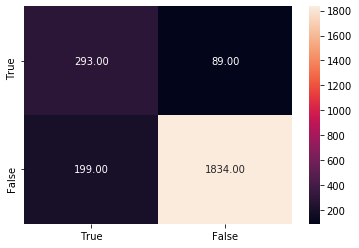

In [144]:
labels = [True, False]
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

In [28]:
y_test.shape

(2415,)

# Deep Neural Network SMOTE

In [23]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sd = MinMaxScaler()
X = sd.fit_transform(ct)
X_test = sd.transform(X_test)
y=  yt

for train_index, test_index in sss.split(X, y):
    Xt, X_val = X[train_index], X[test_index]
    ytr, y_val = y[train_index], y[test_index]

In [24]:
(train_data, train_target), (val_data, val_target) = (Xt,ytr),(X_val,y_val)

In [25]:
(train_data.shape, train_target.shape), (val_data.shape, val_target.shape)

(((13009, 57), (13009,)), ((3253, 57), (3253,)))

In [26]:
train_target.sum(), val_target.sum()

(6505, 1626)

In [50]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(30, activation='relu', input_shape=(ct.shape[1],)))
network.add(layers.Dropout(0.2))
network.add(layers.Dense(15, activation='relu'))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(1, activation='sigmoid'))

In [51]:
# Compile neural network

network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='ADAM', # Root Mean Square Propagation
                metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]) # Accuracy performance metric

In [52]:
# Train neural network
history = network.fit(train_data, # Features
                      train_target, # Target vector
                      epochs=200, # Number of epochs
                      verbose=2, # Print description after each epoch
                      batch_size=200, # Number of observations per batch
                      validation_data=(val_data, val_target)) # Data for evaluation

Train on 13009 samples, validate on 3253 samples
Epoch 1/200
 - 1s - loss: 0.6878 - accuracy: 0.5395 - auc_1: 0.5229 - precision_1: 0.5147 - recall_1: 0.5107 - val_loss: 0.6666 - val_accuracy: 0.6388 - val_auc_1: 0.5716 - val_precision_1: 0.5494 - val_recall_1: 0.5648
Epoch 2/200
 - 0s - loss: 0.6577 - accuracy: 0.6104 - auc_1: 0.5973 - precision_1: 0.5669 - recall_1: 0.5976 - val_loss: 0.6160 - val_accuracy: 0.6748 - val_auc_1: 0.6247 - val_precision_1: 0.5829 - val_recall_1: 0.6171
Epoch 3/200
 - 0s - loss: 0.6206 - accuracy: 0.6575 - auc_1: 0.6410 - precision_1: 0.5941 - recall_1: 0.6330 - val_loss: 0.5797 - val_accuracy: 0.6972 - val_auc_1: 0.6592 - val_precision_1: 0.6050 - val_recall_1: 0.6549
Epoch 4/200
 - 0s - loss: 0.5909 - accuracy: 0.6890 - auc_1: 0.6721 - precision_1: 0.6130 - recall_1: 0.6736 - val_loss: 0.5557 - val_accuracy: 0.7132 - val_auc_1: 0.6846 - val_precision_1: 0.6200 - val_recall_1: 0.6908
Epoch 5/200
 - 0s - loss: 0.5688 - accuracy: 0.7118 - auc_1: 0.6947 - p

Epoch 38/200
 - 0s - loss: 0.2749 - accuracy: 0.8946 - auc_1: 0.9113 - precision_1: 0.8082 - recall_1: 0.8650 - val_loss: 0.2479 - val_accuracy: 0.9062 - val_auc_1: 0.9120 - val_precision_1: 0.8091 - val_recall_1: 0.8658
Epoch 39/200
 - 0s - loss: 0.2724 - accuracy: 0.8976 - auc_1: 0.9127 - precision_1: 0.8101 - recall_1: 0.8665 - val_loss: 0.2477 - val_accuracy: 0.9062 - val_auc_1: 0.9133 - val_precision_1: 0.8109 - val_recall_1: 0.8671
Epoch 40/200
 - 0s - loss: 0.2698 - accuracy: 0.8982 - auc_1: 0.9139 - precision_1: 0.8118 - recall_1: 0.8678 - val_loss: 0.2544 - val_accuracy: 0.8998 - val_auc_1: 0.9146 - val_precision_1: 0.8127 - val_recall_1: 0.8685
Epoch 41/200
 - 0s - loss: 0.2657 - accuracy: 0.8994 - auc_1: 0.9152 - precision_1: 0.8136 - recall_1: 0.8691 - val_loss: 0.2532 - val_accuracy: 0.9035 - val_auc_1: 0.9158 - val_precision_1: 0.8144 - val_recall_1: 0.8697
Epoch 42/200
 - 0s - loss: 0.2702 - accuracy: 0.8983 - auc_1: 0.9164 - precision_1: 0.8152 - recall_1: 0.8703 - val_

Epoch 76/200
 - 0s - loss: 0.2326 - accuracy: 0.9132 - auc_1: 0.9386 - precision_1: 0.8509 - recall_1: 0.8934 - val_loss: 0.2332 - val_accuracy: 0.9118 - val_auc_1: 0.9388 - val_precision_1: 0.8513 - val_recall_1: 0.8936
Epoch 77/200
 - 0s - loss: 0.2340 - accuracy: 0.9129 - auc_1: 0.9390 - precision_1: 0.8516 - recall_1: 0.8937 - val_loss: 0.2334 - val_accuracy: 0.9078 - val_auc_1: 0.9392 - val_precision_1: 0.8520 - val_recall_1: 0.8939
Epoch 78/200
 - 0s - loss: 0.2311 - accuracy: 0.9157 - auc_1: 0.9394 - precision_1: 0.8523 - recall_1: 0.8941 - val_loss: 0.2244 - val_accuracy: 0.9158 - val_auc_1: 0.9396 - val_precision_1: 0.8526 - val_recall_1: 0.8943
Epoch 79/200
 - 0s - loss: 0.2341 - accuracy: 0.9134 - auc_1: 0.9398 - precision_1: 0.8529 - recall_1: 0.8945 - val_loss: 0.2282 - val_accuracy: 0.9127 - val_auc_1: 0.9400 - val_precision_1: 0.8533 - val_recall_1: 0.8947
Epoch 80/200
 - 0s - loss: 0.2324 - accuracy: 0.9136 - auc_1: 0.9402 - precision_1: 0.8536 - recall_1: 0.8949 - val_

 - 0s - loss: 0.2153 - accuracy: 0.9177 - auc_1: 0.9491 - precision_1: 0.8696 - recall_1: 0.9034 - val_loss: 0.2195 - val_accuracy: 0.9170 - val_auc_1: 0.9492 - val_precision_1: 0.8698 - val_recall_1: 0.9035
Epoch 114/200
 - 0s - loss: 0.2201 - accuracy: 0.9170 - auc_1: 0.9493 - precision_1: 0.8700 - recall_1: 0.9036 - val_loss: 0.2236 - val_accuracy: 0.9127 - val_auc_1: 0.9494 - val_precision_1: 0.8701 - val_recall_1: 0.9037
Epoch 115/200
 - 0s - loss: 0.2194 - accuracy: 0.9195 - auc_1: 0.9495 - precision_1: 0.8703 - recall_1: 0.9038 - val_loss: 0.2168 - val_accuracy: 0.9188 - val_auc_1: 0.9496 - val_precision_1: 0.8705 - val_recall_1: 0.9039
Epoch 116/200
 - 0s - loss: 0.2156 - accuracy: 0.9190 - auc_1: 0.9497 - precision_1: 0.8707 - recall_1: 0.9040 - val_loss: 0.2220 - val_accuracy: 0.9139 - val_auc_1: 0.9498 - val_precision_1: 0.8708 - val_recall_1: 0.9041
Epoch 117/200
 - 0s - loss: 0.2125 - accuracy: 0.9191 - auc_1: 0.9499 - precision_1: 0.8710 - recall_1: 0.9042 - val_loss: 0.2

Epoch 150/200
 - 0s - loss: 0.2071 - accuracy: 0.9198 - auc_1: 0.9550 - precision_1: 0.8800 - recall_1: 0.9091 - val_loss: 0.2214 - val_accuracy: 0.9152 - val_auc_1: 0.9551 - val_precision_1: 0.8801 - val_recall_1: 0.9091
Epoch 151/200
 - 0s - loss: 0.1994 - accuracy: 0.9251 - auc_1: 0.9552 - precision_1: 0.8803 - recall_1: 0.9092 - val_loss: 0.2236 - val_accuracy: 0.9133 - val_auc_1: 0.9552 - val_precision_1: 0.8804 - val_recall_1: 0.9092
Epoch 152/200
 - 0s - loss: 0.2071 - accuracy: 0.9200 - auc_1: 0.9553 - precision_1: 0.8805 - recall_1: 0.9093 - val_loss: 0.2168 - val_accuracy: 0.9155 - val_auc_1: 0.9554 - val_precision_1: 0.8806 - val_recall_1: 0.9093
Epoch 153/200
 - 0s - loss: 0.2024 - accuracy: 0.9234 - auc_1: 0.9554 - precision_1: 0.8808 - recall_1: 0.9094 - val_loss: 0.2187 - val_accuracy: 0.9158 - val_auc_1: 0.9555 - val_precision_1: 0.8809 - val_recall_1: 0.9094
Epoch 154/200
 - 0s - loss: 0.2071 - accuracy: 0.9215 - auc_1: 0.9556 - precision_1: 0.8810 - recall_1: 0.9095 -

Epoch 187/200
 - 0s - loss: 0.2024 - accuracy: 0.9255 - auc_1: 0.9590 - precision_1: 0.8874 - recall_1: 0.9125 - val_loss: 0.2170 - val_accuracy: 0.9164 - val_auc_1: 0.9591 - val_precision_1: 0.8875 - val_recall_1: 0.9125
Epoch 188/200
 - 0s - loss: 0.2018 - accuracy: 0.9238 - auc_1: 0.9591 - precision_1: 0.8876 - recall_1: 0.9125 - val_loss: 0.2161 - val_accuracy: 0.9164 - val_auc_1: 0.9592 - val_precision_1: 0.8876 - val_recall_1: 0.9126
Epoch 189/200
 - 0s - loss: 0.2074 - accuracy: 0.9196 - auc_1: 0.9592 - precision_1: 0.8877 - recall_1: 0.9126 - val_loss: 0.2166 - val_accuracy: 0.9158 - val_auc_1: 0.9592 - val_precision_1: 0.8878 - val_recall_1: 0.9126
Epoch 190/200
 - 0s - loss: 0.1961 - accuracy: 0.9268 - auc_1: 0.9593 - precision_1: 0.8879 - recall_1: 0.9127 - val_loss: 0.2135 - val_accuracy: 0.9185 - val_auc_1: 0.9593 - val_precision_1: 0.8880 - val_recall_1: 0.9127
Epoch 191/200
 - 0s - loss: 0.1943 - accuracy: 0.9280 - auc_1: 0.9594 - precision_1: 0.8881 - recall_1: 0.9128 -

In [53]:
ypred = network.predict(X_test)
pred = (ypred > 0.5)

ROC AUC: 0.811
Accuracy: 0.891
Balanced Accuracy: 0.811
f1: 0.668
Precision: 0.643
Recall: 0.694
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2033
           1       0.64      0.69      0.67       382

    accuracy                           0.89      2415
   macro avg       0.79      0.81      0.80      2415
weighted avg       0.89      0.89      0.89      2415



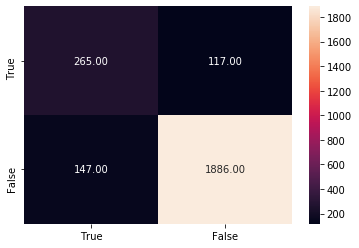

In [54]:
labels = [True, False]
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

In [61]:
ypred = network.predict(X_test)
pred = (ypred > 0.4)

ROC AUC: 0.831
Accuracy: 0.887
Balanced Accuracy: 0.831
f1: 0.677
Precision: 0.618
Recall: 0.749
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2033
           1       0.62      0.75      0.68       382

    accuracy                           0.89      2415
   macro avg       0.78      0.83      0.80      2415
weighted avg       0.90      0.89      0.89      2415



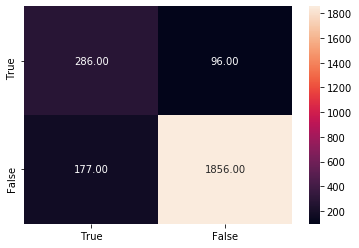

In [62]:
labels = [True, False]
print('ROC AUC: %.3f' % metrics.roc_auc_score(y_test,pred))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test,pred))
print('Balanced Accuracy: %.3f' % metrics.balanced_accuracy_score(y_test,pred))
print('f1: %.3f' % metrics.f1_score(y_test,pred))
print('Precision: %.3f' % metrics.precision_score(y_test,pred))
print('Recall: %.3f' % metrics.recall_score(y_test,pred))
print(classification_report(y_test,pred))
array = confusion_matrix(y_test,pred,labels=labels)
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
sns.heatmap(df_cm, annot=True,fmt='.2f')

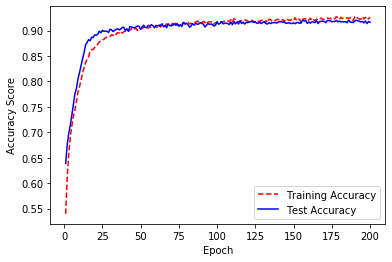

In [63]:
# Get training and test accuracy histories
# Get training and test accuracy histories
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();

<h1 style="font-size:44px"> Clustering using k-means</h1>

In [89]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist

In [93]:
main_data = pd.read_csv('online_shoppers_intention.csv')
main_data = main_data.drop_duplicates()
data = main_data.copy(deep=True)

In [94]:
num_att = ['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'ExitRates',
 'BounceRates',
 'PageValues',
 'SpecialDay']
cat_columns = ['TrafficType','Region','Month','VisitorType','SpecialDay','OperatingSystems','Browser']

#changing the column types
for i in cat_columns:
    data[i] = data[i].astype('category')

dummy = pd.get_dummies(data[cat_columns])
data = pd.concat([data,dummy],axis=1)
data = data.drop(cat_columns,axis=1)
data.Weekend = data.Weekend.replace({True:1,False:0})
data.Revenue = data.Revenue.replace({True:1,False:0})
# data = data.drop_duplicates()

In [95]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend,...,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [96]:
X = data.iloc[:,:9]
# X = data.copy(deep=True)

In [97]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0


In [98]:
std = StandardScaler()
X = std.fit_transform(X)

In [99]:
X

array([[-0.70230237, -0.46001931, -0.3988242 , ...,  3.96940208,
         3.4343938 , -0.31896229],
       [-0.70230237, -0.46001931, -0.3988242 , ..., -0.45013707,
         1.26805406, -0.31896229],
       [-0.70230237, -0.46001931, -0.3988242 , ...,  3.96940208,
         3.4343938 , -0.31896229],
       ...,
       [-0.70230237, -0.46001931, -0.3988242 , ...,  1.39133757,
         0.97920877, -0.31896229],
       [ 0.49879066, -0.03744737, -0.3988242 , ..., -0.45013707,
        -0.44221415, -0.31896229],
       [-0.70230237, -0.46001931, -0.3988242 , ..., -0.45013707,
         0.54594082, -0.31896229]])

In [100]:
data.iloc[:,9:].head()

,Weekend,Revenue,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,...,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X = np.concatenate([X,data.iloc[:,9:].values],axis=1)

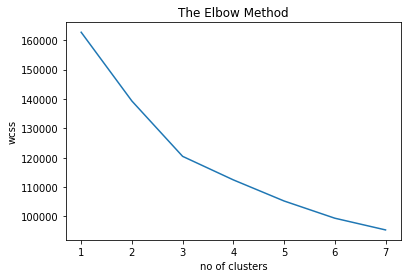

In [102]:
ss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    ss.append(kmeans.inertia_)
plt.plot(range(1,8), ss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [103]:
from sklearn.metrics import silhouette_samples, silhouette_score
for n_clusters in range(2,8):
    clusterer = KMeans(n_clusters=n_clusters, init = 'k-means++',random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.31841070929989074
For n_clusters = 3 The average silhouette_score is : 0.303180528746391
For n_clusters = 4 The average silhouette_score is : 0.20742178671299885
For n_clusters = 5 The average silhouette_score is : 0.2085151945242288
For n_clusters = 6 The average silhouette_score is : 0.20212457953516688
For n_clusters = 7 The average silhouette_score is : 0.11643247742064303


In [108]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([0, 2, 0, ..., 2, 2, 2])

In [109]:
main_data['Cluster'] = kmeans.labels_

In [110]:
main_data['Cluster'].value_counts()

2    9641
1    1633
0     931
Name: Cluster, dtype: int64

In [107]:
main_data.to_csv('D:/imbalance/results_noclass.csv')

In [115]:
# Some functions to plot just the variables that has significant deviation from global mean
def outside_limit(df, label_col, label, sensitivity):
    feature_list = data.drop('Cluster',axis=1).columns
  
    plot_list = []
    mean_overall_list = []
    mean_cluster_list = []

    for i,varname in enumerate(feature_list):

    #     get overall mean for a variable, set lower and upper limit
        mean_overall = df[varname].mean()
        lower_limit = mean_overall - (mean_overall*sensitivity)
        upper_limit = mean_overall + (mean_overall*sensitivity)

        #     get cluster mean for a variable
        cluster_filter = df[label_col]==label
        pd_cluster = df[cluster_filter]
        mean_cluster = pd_cluster[varname].mean()

        #     create filter to display graph with 0.5 deviation from the mean
        if mean_cluster <= lower_limit or mean_cluster >= upper_limit:
            plot_list.append(varname)
            mean_overall_std = mean_overall/mean_overall
            mean_cluster_std = mean_cluster/mean_overall
            mean_overall_list.append(mean_overall_std)
            mean_cluster_list.append(mean_cluster_std)

    mean_df = pd.DataFrame({'feature_list':plot_list,
                         'mean_overall_list':mean_overall_list,
                         'mean_cluster_list':mean_cluster_list})
    mean_df = mean_df.sort_values(by=['mean_cluster_list'], ascending=False)

    return mean_df

def plot_barchart_all_unique_features(df, label_col, label, ax, sensitivity):
  
    mean_df = outside_limit(df, label_col, label, sensitivity)
    mean_df_to_plot = mean_df.drop(['mean_overall_list'], axis=1)

    if len(mean_df.index) != 0:
    sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
                alpha=0.75, dodge=True, ax=ax)

    for i,p in enumerate(ax.patches):
        ax.annotate("{:.02f}".format((p.get_width())), 
                  (1, p.get_y() + p.get_height() / 2.), xycoords=('axes fraction', 'data'),
                  ha='right', va='top', fontsize=10, color='black', rotation=0, 
                  xytext=(0, 0),
                  textcoords='offset pixels')

    ax.set_title('Unique Characteristics of Cluster ' + str(label))
    ax.set_xlabel('Standardized Mean')
    ax.axvline(x=1, color='k')

def plot_features_all_cluster(df, label_col, n_clusters, sensitivity):
    n_plot = n_clusters
    fig, ax = plt.subplots(n_plot, 1, figsize=(20, n_plot*12), sharex='col')
    ax= ax.ravel()

    label = np.arange(n_clusters)
    for i in label:
    plot_barchart_all_unique_features(df, label_col, label=i, ax=ax[i], sensitivity=sensitivity)
    ax[i].xaxis.set_tick_params(labelbottom=True)

    plt.tight_layout()
    display(fig)

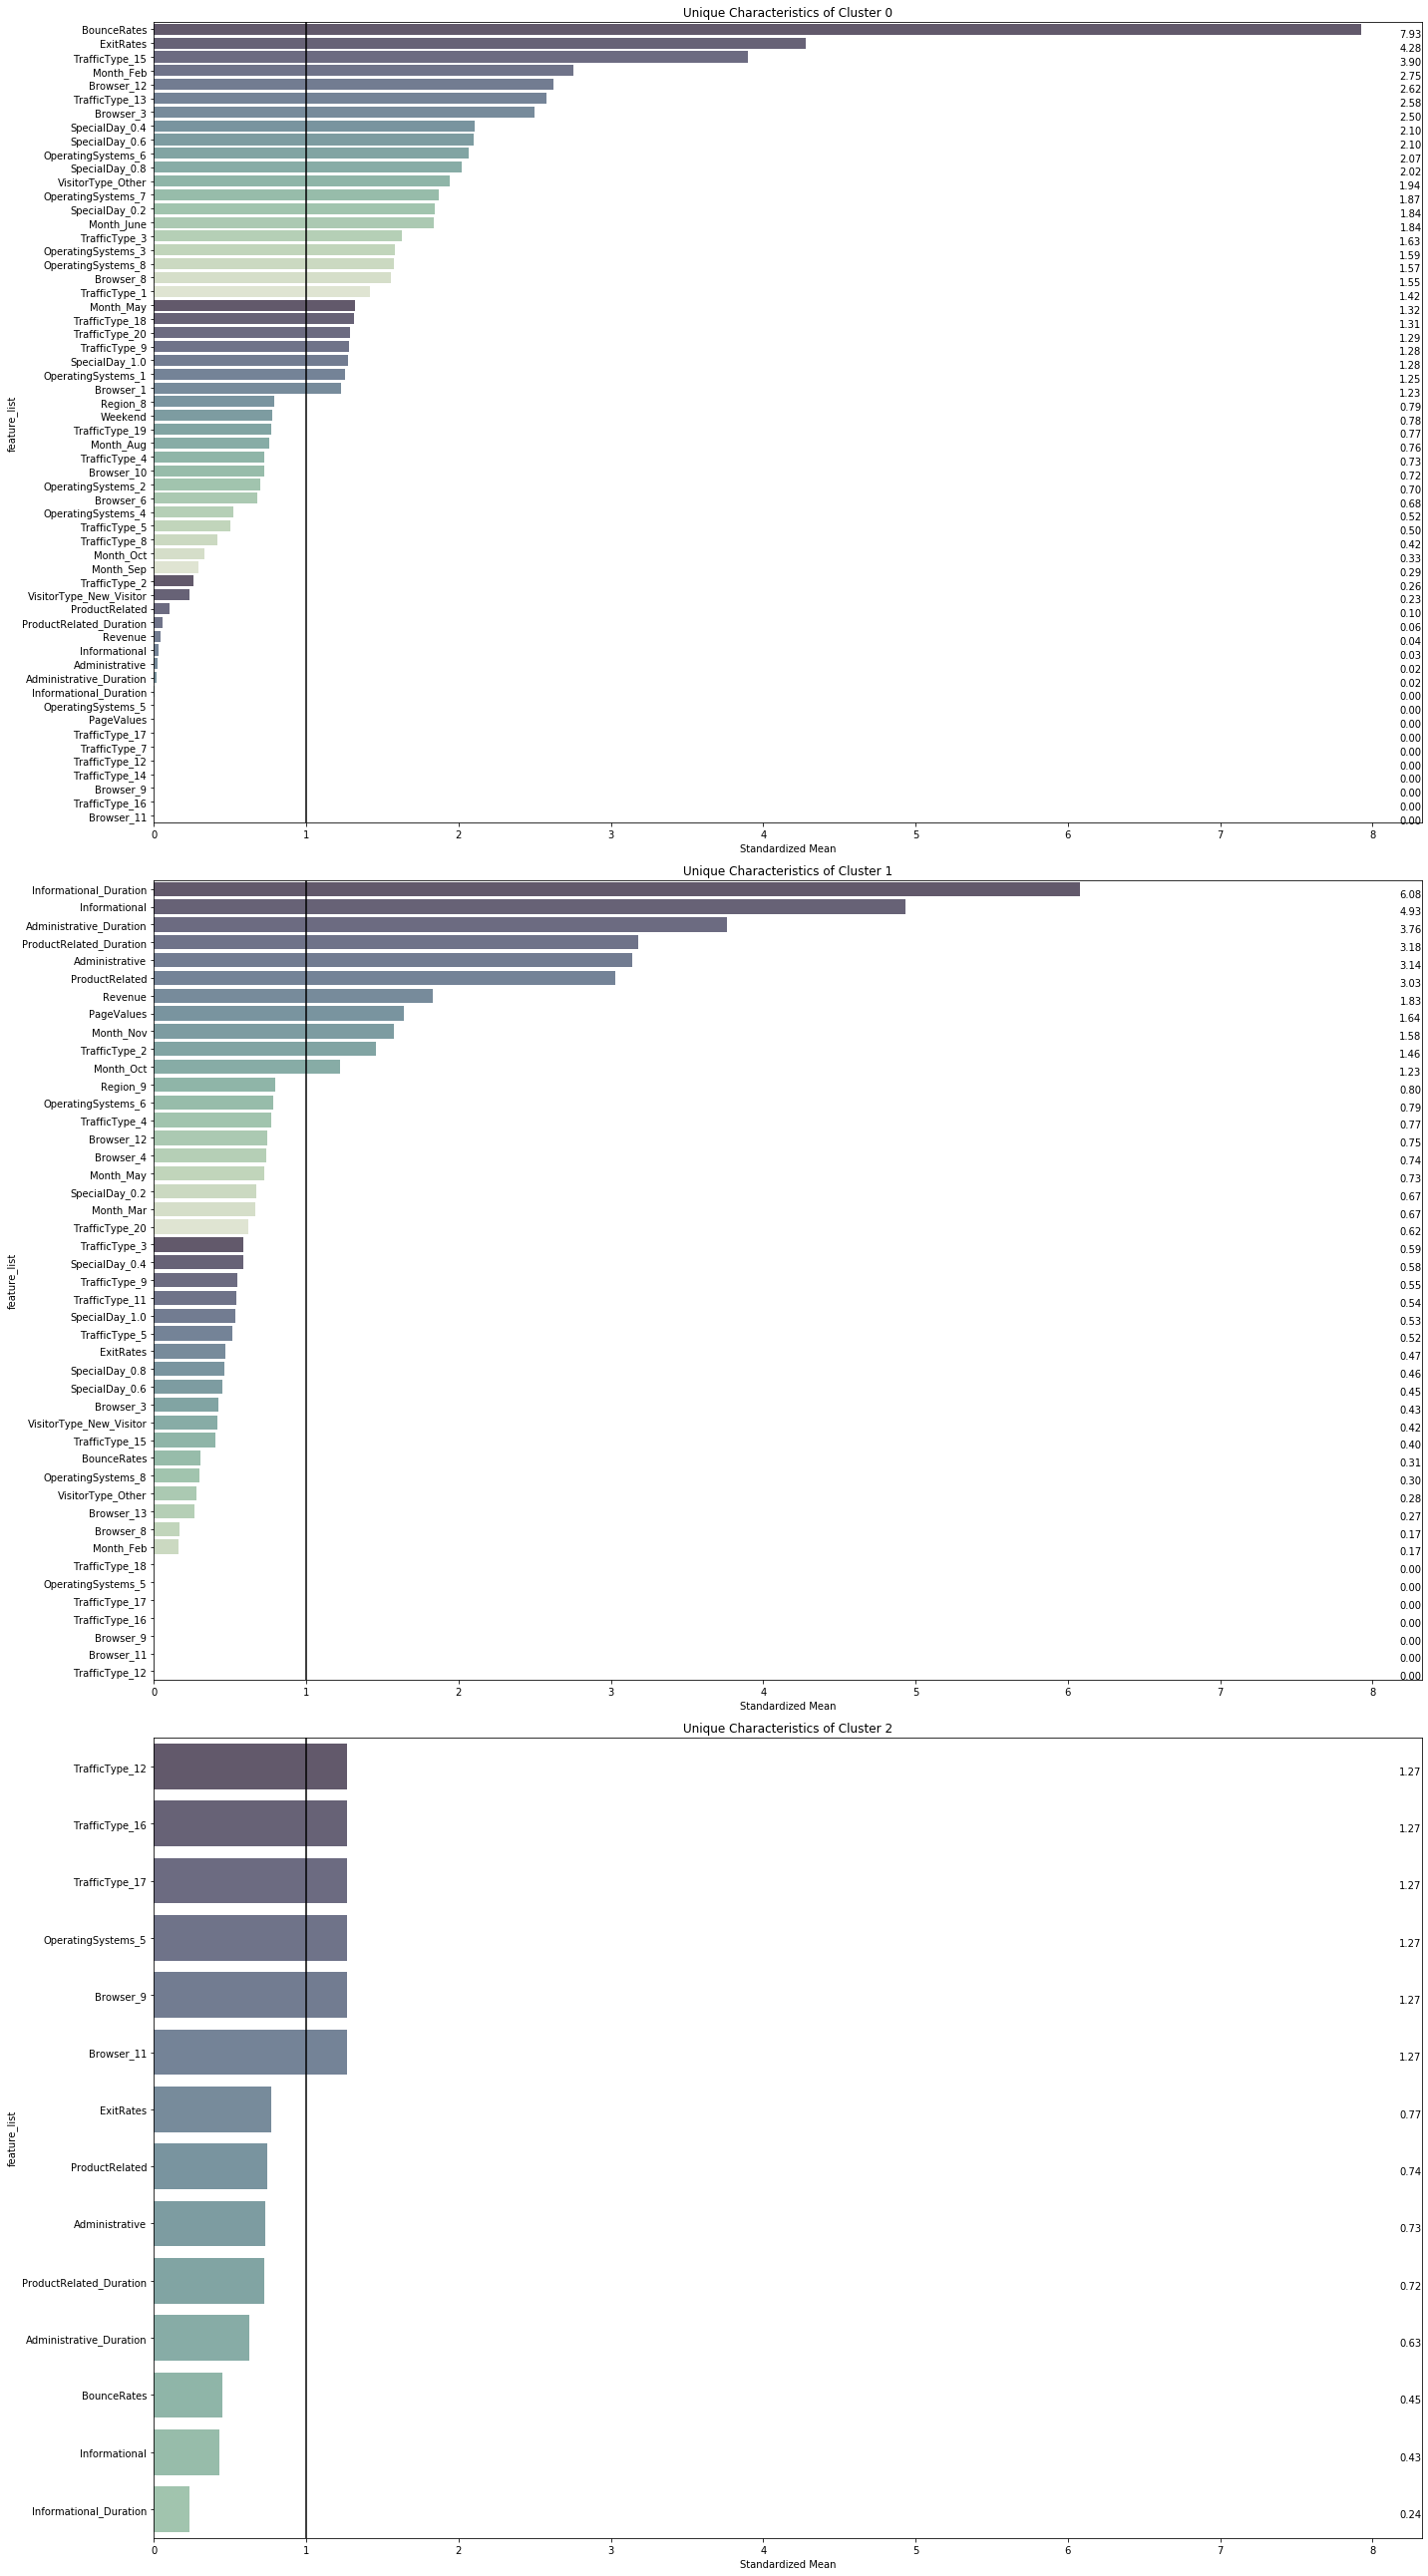

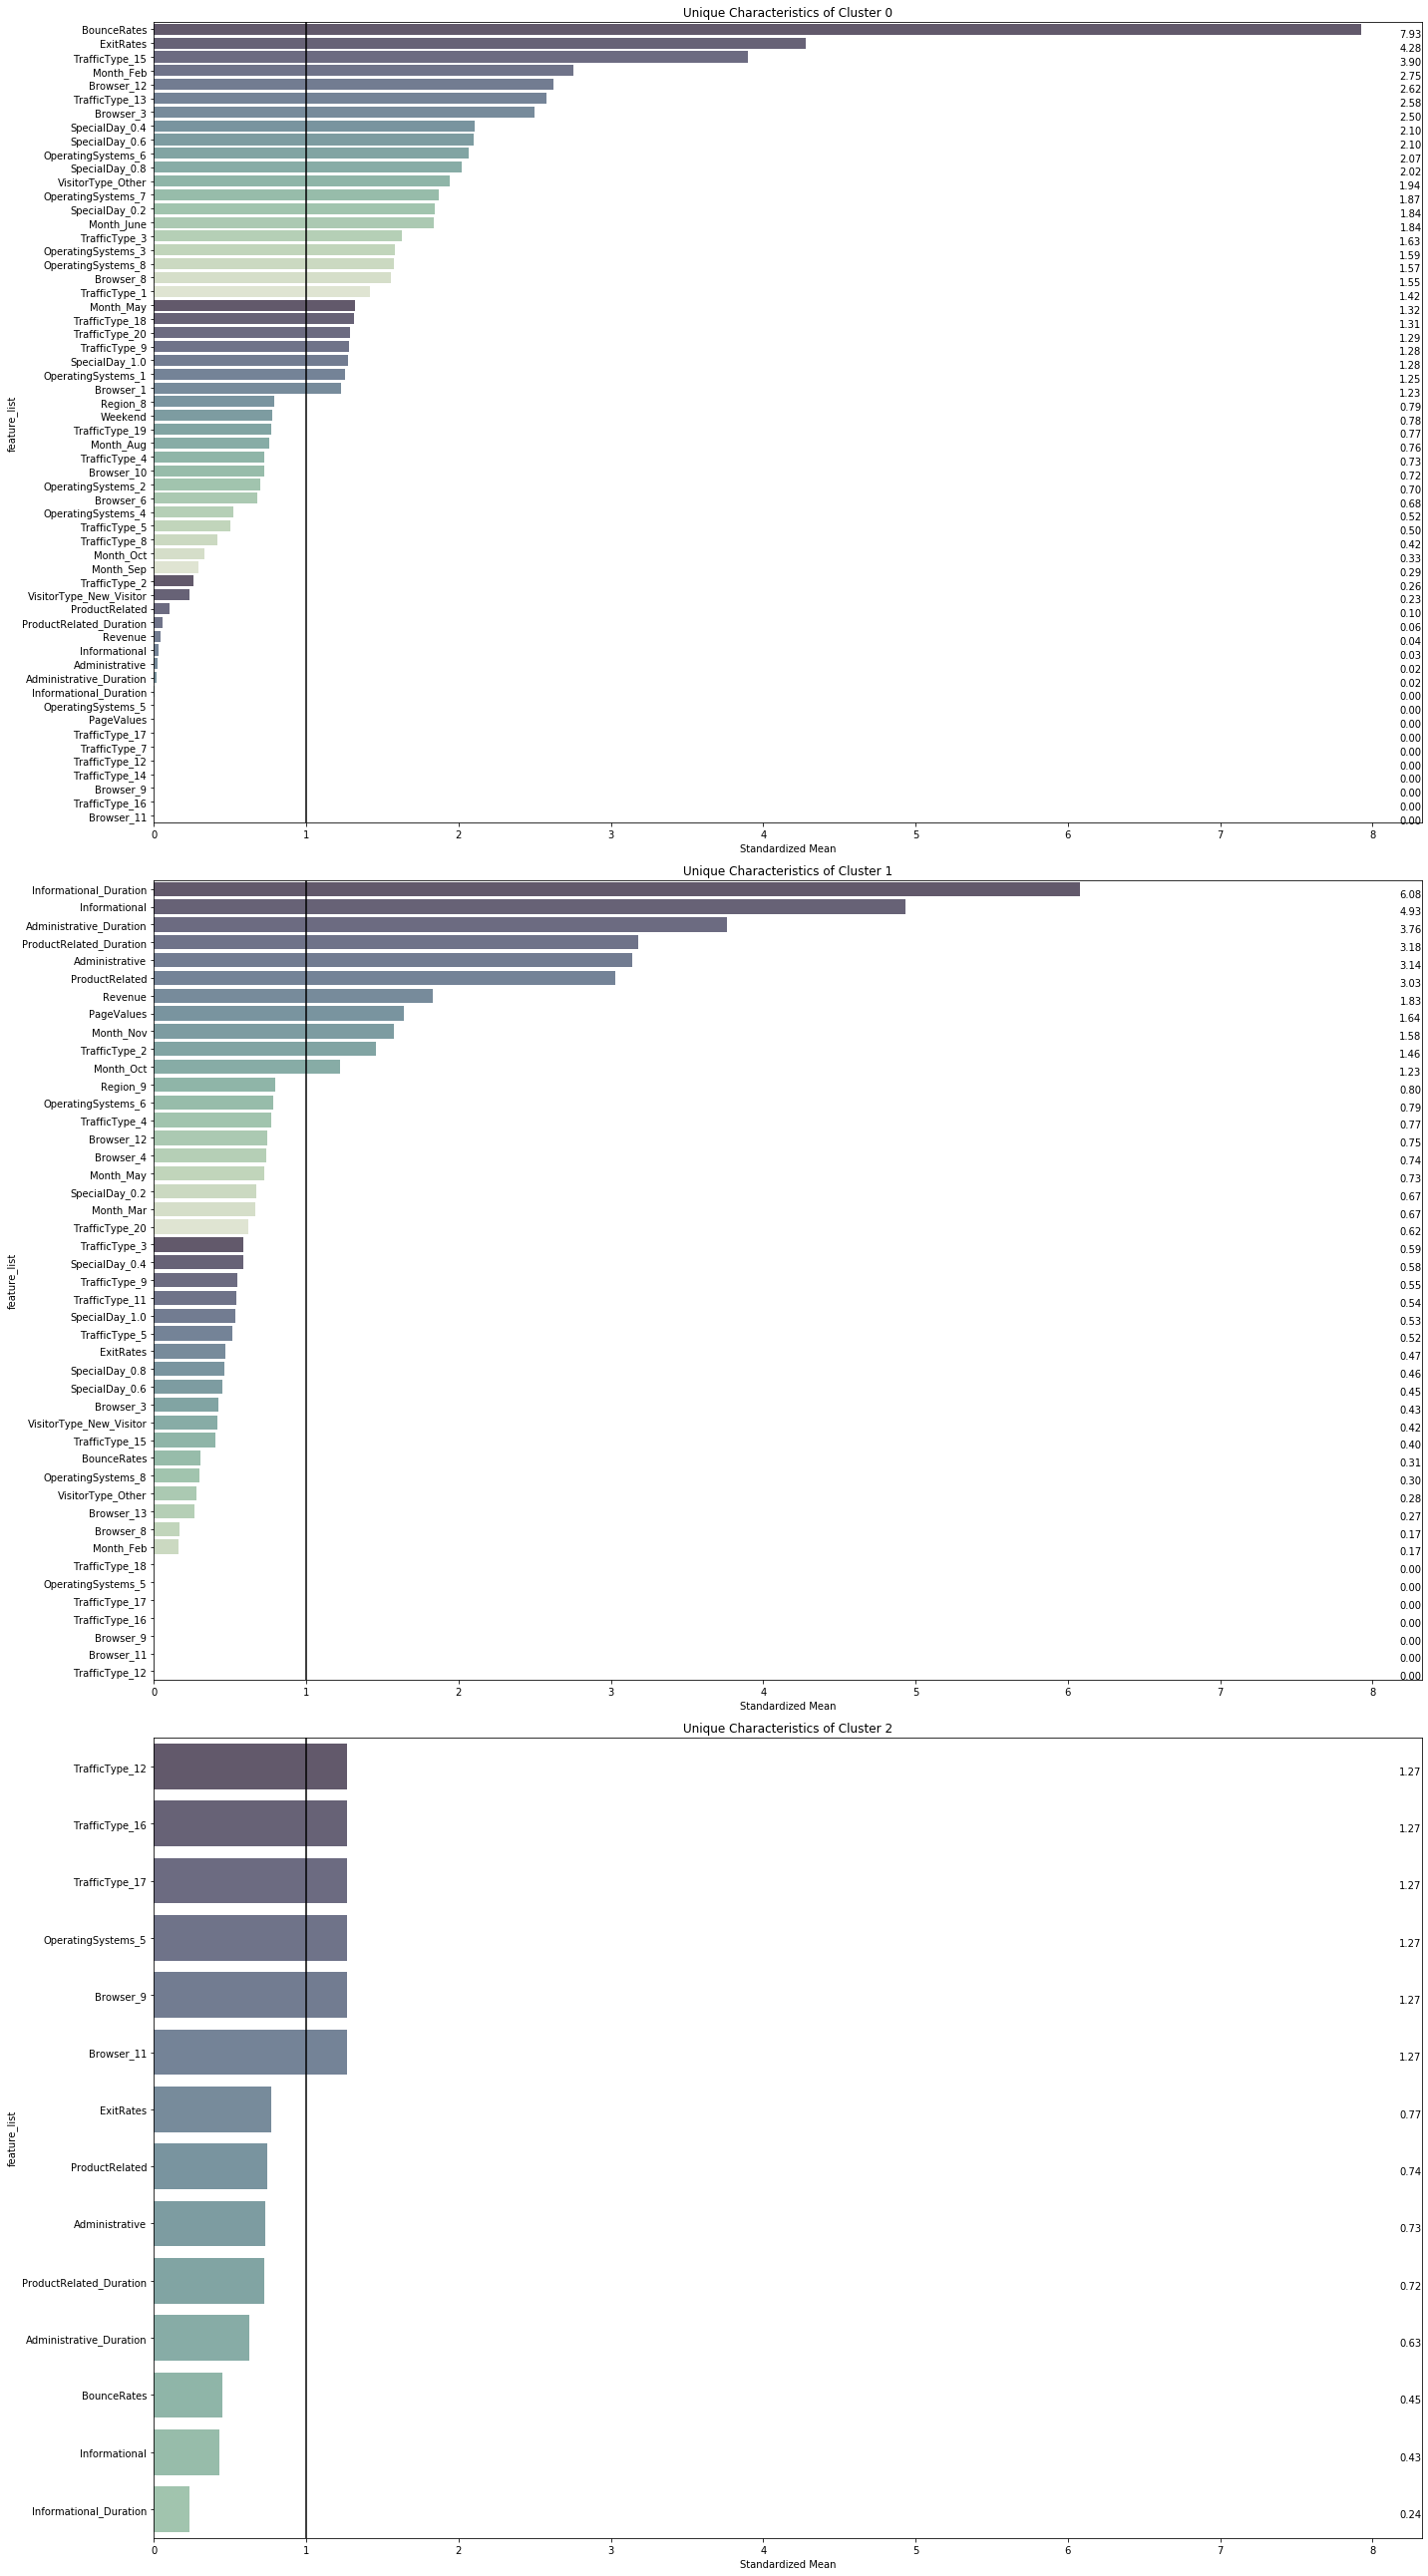

In [116]:
plot_features_all_cluster(df=data, label_col='Cluster', n_clusters=3, sensitivity=0.2)
